## Install requirements

In [1]:
!python.exe -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%pip install -r requirements-torch-windows.txt
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Init stable diffusion

In [3]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, StableDiffusionUpscalePipeline
import torch

def initdiffusionpipeline(model_id):
    # Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cuda")
    return pipe

#diffusionpipeline=initdiffusionpipeline("stabilityai/stable-diffusion-2-1")
diffusionpipeline=initdiffusionpipeline("dreamlike-art/dreamlike-diffusion-1.0")

C:\Users\key\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
text_encoder\model.safetensors not found
Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]








Fetching 13 files:  23%|██▎       | 3/13 [00:00<00:01,  6.91it/s]
































































Fetching 13 files:  38%|███▊      | 5/13 [00:07<00:14,  1.79s/it]













































































































































































































































































Fetching 13 files: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]


In [4]:
def initupscalepipeline(model_id):
    pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipeline.enable_attention_slicing() 
    pipeline = pipeline.to("cuda")
    return pipeline

upscalepipeline=initupscalepipeline("stabilityai/stable-diffusion-x4-upscaler")

text_encoder\model.safetensors not found


In [5]:
def generate(prompt,seed=42):
    generator = torch.Generator("cuda").manual_seed(seed)
    image = diffusionpipeline(prompt,generator=generator).images[0]
    fname = f"images/{prompt.replace(' ','-')}.png"
    image.save(fname)
    display(image)
    return image

In [6]:
def upscale(prompt,image,seed=42):
    generator = torch.Generator("cuda").manual_seed(seed)
    upscaled_image = upscalepipeline(prompt=prompt, image=image,generator=generator).images[0]
    fname = f"images/{prompt.replace(' ','-')}-upscaled.png"
    upscaled_image.save(fname)
    display(image)  # open inline
    #image.show() # open outside
    return image

## Run

100%|██████████| 50/50 [00:06<00:00,  7.51it/s]


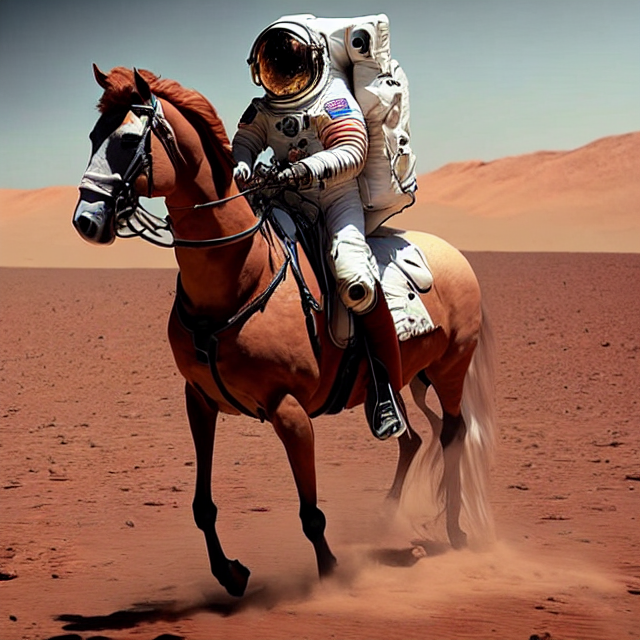

In [7]:
img=generate("a photo of an astronaut riding a horse on mars")

In [8]:
# upscale("a photo of an astronaut riding a horse on mars",img)